# Random Forest Models and Decision Trees

Classifying Parkinsons Disease with Random Forests, comparing to decision trees
- Focus on original keystroke data

*N=191*

In [ ]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.base import clone


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

In [ ]:
## Data preparation

forest = pd.read_csv("Imputed_ALLdata_Ivan-Copy1.csv")

forest['target'] = -99

forest.loc[forest.Parkinsons == 0,'target'] = 0
forest.loc[forest.Parkinsons == 1,'target'] = 1


X = forest.iloc[:,0:100]
y = forest ['target'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y)

In [ ]:
## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score

In [47]:
#Checking the var names and data set
#dir(forest)
forest

,LLHold,LLLatency,LRHold,LRLatency,LSHold,LSLatency,RLHold,RLLatency,RRHold,RRLatency,...,RLatencyKurt,SHoldKurt,SLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,HoldMean,LatencyMean,Parkinsons,target
0,82.169040,263.586377,81.946810,277.610541,113.966144,205.839312,74.671148,416.856331,79.294563,273.864624,...,-1.138668,18.938591,2.047950,-1.555339,-10.278246,-139.245790,87.090011,286.112183,1,1
1,97.654140,406.716242,107.138017,411.718182,134.881818,328.748864,100.917949,430.258974,96.400784,365.736471,...,-0.838186,0.696979,0.597395,-2.663930,40.979771,-18.540793,102.873688,405.924138,0,0
2,143.399528,347.882547,105.325886,313.541489,94.020690,338.639655,163.700000,310.799454,106.208750,322.170833,...,-0.177558,6.900573,-0.340523,48.079984,25.711714,2.742036,123.793469,325.569638,0,0
3,87.418105,316.334084,95.753906,351.168548,95.613694,355.430828,91.759075,311.695939,87.046902,338.282118,...,-0.447737,6.529645,-0.368982,-1.529482,-21.948033,39.472609,90.409640,327.473805,1,1
4,81.947761,360.546269,88.875000,460.950000,92.927778,424.529894,78.100000,240.200000,83.886364,355.140909,...,3.726850,66.079168,10.284850,-2.262416,5.405360,220.750000,90.442364,406.111687,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,114.451691,380.816425,114.250244,378.445122,118.110000,275.342000,109.490793,322.538107,107.901394,379.116725,...,0.117846,3.939433,4.542159,0.311773,1.699700,55.907015,112.126444,363.161854,1,1
187,109.729223,353.762243,110.151315,353.846670,119.099873,381.563104,114.032972,347.541292,108.025824,359.277471,...,-0.231702,6.849089,-0.533829,2.120533,-5.515228,6.305378,111.292535,358.254872,1,1
188,80.446667,288.293333,93.760000,353.140000,101.600000,345.700000,92.071429,403.742857,91.800000,314.466667,...,0.341831,3.693052,2.262993,-6.379487,-26.173333,-50.602857,88.709615,337.600000,1,1
189,101.543809,158.094059,92.716100,153.591263,88.772980,173.464290,97.558775,142.231463,95.320305,169.229961,...,1.663209,0.535376,0.230168,3.168687,-11.135901,11.359799,93.502747,157.165172,1,1


In [40]:
## Perform cross-validation to find the optimal
## max_depth for one of the three performance measures

kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)

#Selecting original keystroke data
keep_cols = ["LLHold", "LLLatency","LRHold", "LRLatency", "LSHold", "LSLatency", 
             "RLHold", "RLLatency", "RRHold", "RRLatency", "LHold","LLatency", "RHold", "RLatency"]


X_train_copy = X_train[keep_cols].copy()

# used previous example's n (max_depth)=20
n = 20

accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))

for j in range(1,n+1):
    print(j)
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train)
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


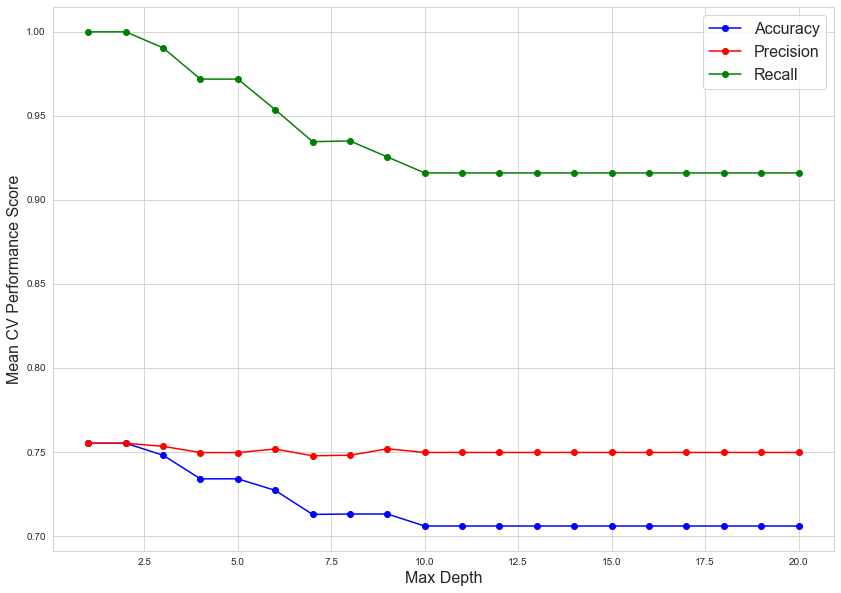

In [35]:
## Plot the mean cv measure against max_depth

plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [42]:
print(precision_score(y_train_test,y_predict))
print(recall_score(y_train_test,y_predict))
print(accuracy_score(y_train_test,y_predict))

0.7407407407407407
0.9523809523809523
0.7142857142857143


## Using Random Forests for Feature Extraction

--Identifying which keystroke variables are most important


In [36]:
forest_clf = RandomForestClassifier(n_estimators=500,max_depth = 3)

forest_clf.fit(X_train_copy, y_train)

RandomForestClassifier(max_depth=3, n_estimators=500)

In [37]:
forest_clf.feature_importances_

array([0.07186611, 0.07305592, 0.07592559, 0.06230636, 0.07816117,
       0.07347559, 0.05145557, 0.06417161, 0.08086061, 0.06405194,
       0.06955229, 0.09629406, 0.06496979, 0.07385341])

In [38]:
## Feature Importance
##This feature of random forests allows us to understand what variables are most important,
   # which can help us explain the algorithm. 
    
names = []
scores = []
for name, score in zip(X_train_copy.columns,forest_clf.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df.sort_values('importance_score',ascending=False)


,feature,importance_score
11,LLatency,0.0963
8,RRHold,0.0809
4,LSHold,0.0782
2,LRHold,0.0759
13,RLatency,0.0739
5,LSLatency,0.0735
1,LLLatency,0.0731
0,LLHold,0.0719
10,LHold,0.0696
12,RHold,0.0650


In [43]:
## Random Forest Probability
#### The first column is probability of being class 0
#### the second is probability of being class 1
forest_clf.predict_proba(X_train_copy)

array([[0.4370564 , 0.5629436 ],
       [0.19629678, 0.80370322],
       [0.37134729, 0.62865271],
       [0.26305636, 0.73694364],
       [0.24451735, 0.75548265],
       [0.09291388, 0.90708612],
       [0.19930671, 0.80069329],
       [0.26413085, 0.73586915],
       [0.28570432, 0.71429568],
       [0.26614687, 0.73385313],
       [0.24381869, 0.75618131],
       [0.09985695, 0.90014305],
       [0.20688849, 0.79311151],
       [0.18962683, 0.81037317],
       [0.26136823, 0.73863177],
       [0.26585999, 0.73414001],
       [0.3205992 , 0.6794008 ],
       [0.23700291, 0.76299709],
       [0.23395251, 0.76604749],
       [0.30177917, 0.69822083],
       [0.20591289, 0.79408711],
       [0.18087027, 0.81912973],
       [0.32987773, 0.67012227],
       [0.2174062 , 0.7825938 ],
       [0.18669691, 0.81330309],
       [0.09150893, 0.90849107],
       [0.19492135, 0.80507865],
       [0.07952057, 0.92047943],
       [0.30380879, 0.69619121],
       [0.36276692, 0.63723308],
       [0.

*_Comparing the Random Forest to the Decision Tree_*

In [44]:
##  DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
## Perform the Decision Tree cross validation

#empty array that will hold all of our accuracy measures
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)

#Again selecting original keystroke data
keep_cols = ["LLHold", "LLLatency","LRHold", "LRLatency", "LSHold", "LSLatency", 
             "RLHold", "RLLatency", "RRHold", "RRLatency", "LHold","LLatency", "RHold", "RLatency"]


X_train_copy = X_train[keep_cols].copy()

#used previous example's n (max_depth)=20
n = 20

tree_accs = np.zeros((5,n))
tree_precs = np.zeros((5,n))
tree_recs = np.zeros((5,n))

for j in range(1,n+1):
    tree = DecisionTreeClassifier(max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        tree_clone = clone(tree)
        tree_clone.fit(X_train_train,y_train_train)
        
        y_predict = tree_clone.predict(X_train_test)
        tree_accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        tree_precs[i,j-1] = precision_score(y_train_test,y_predict)
        tree_recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

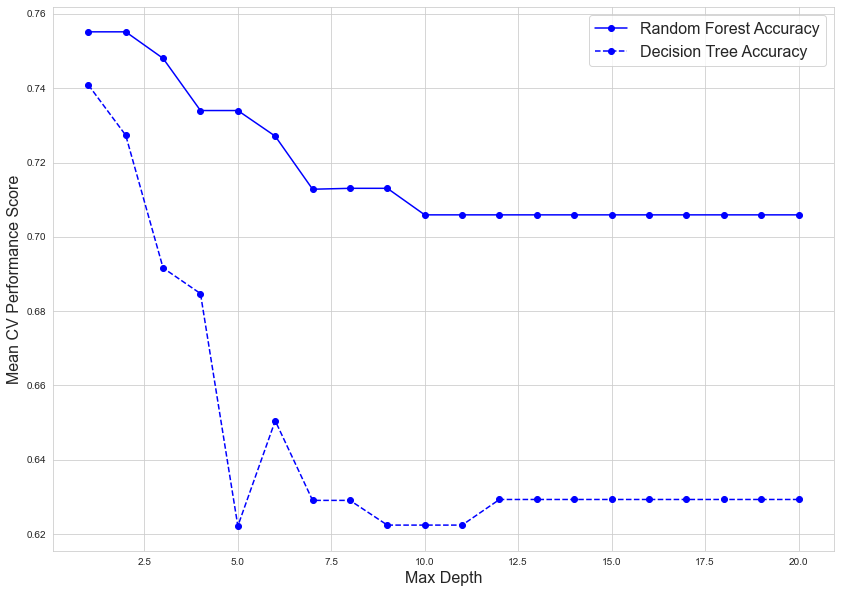

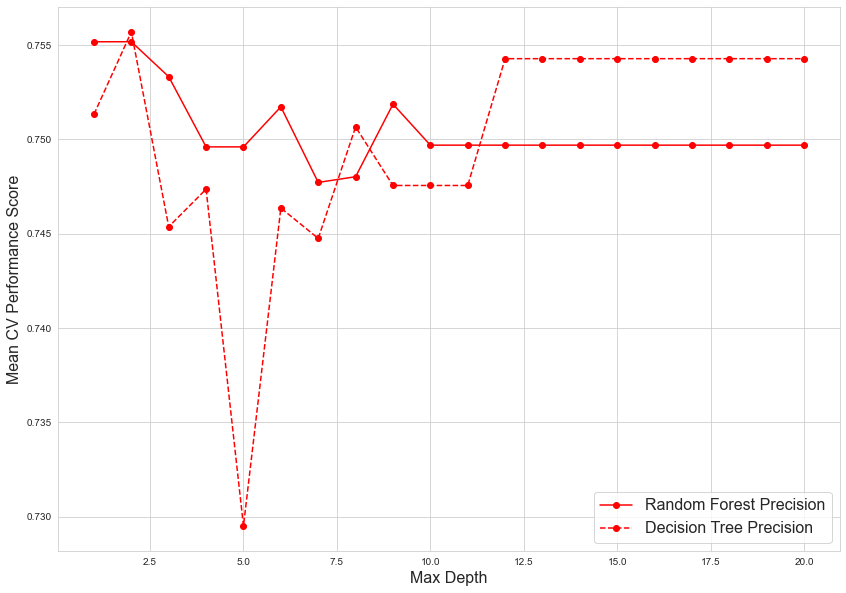

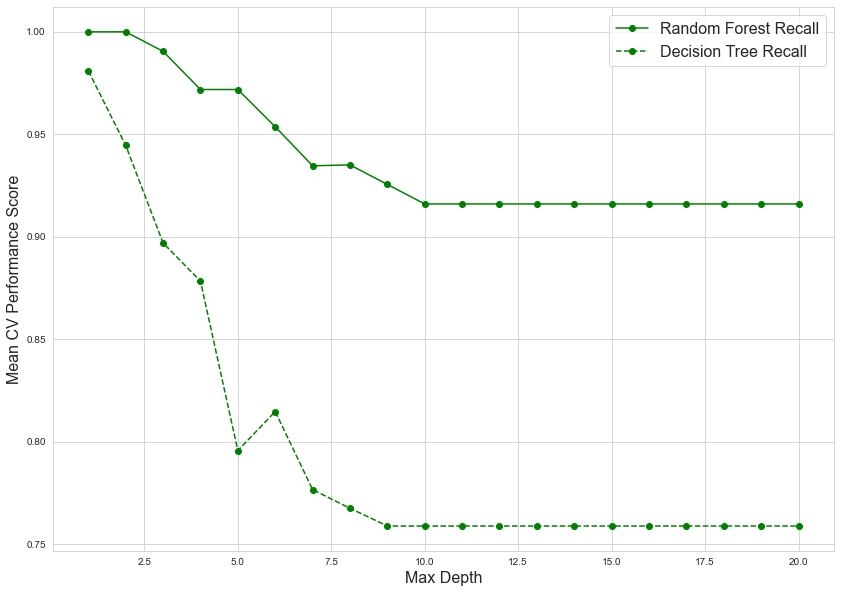

In [46]:
## Plotting the random forest and decision tree 

plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Random Forest Accuracy")
plt.plot(range(1,n+1), np.mean(tree_accs,axis=0),'b--o', label="Decision Tree Accuracy")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Random Forest Precision")
plt.plot(range(1,n+1), np.mean(tree_precs,axis=0),'r--o', label="Decision Tree Precision")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()


plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Random Forest Recall")
plt.plot(range(1,n+1), np.mean(tree_recs,axis=0),'g--o', label="Decision Tree Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

